In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from pathlib import Path
import tarfile
import urllib.request

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [2]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data Structure

In [3]:
vehicle = pd.read_csv('./data/CO2 Emissions_Canada.csv')
vehicle.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
vehicle.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


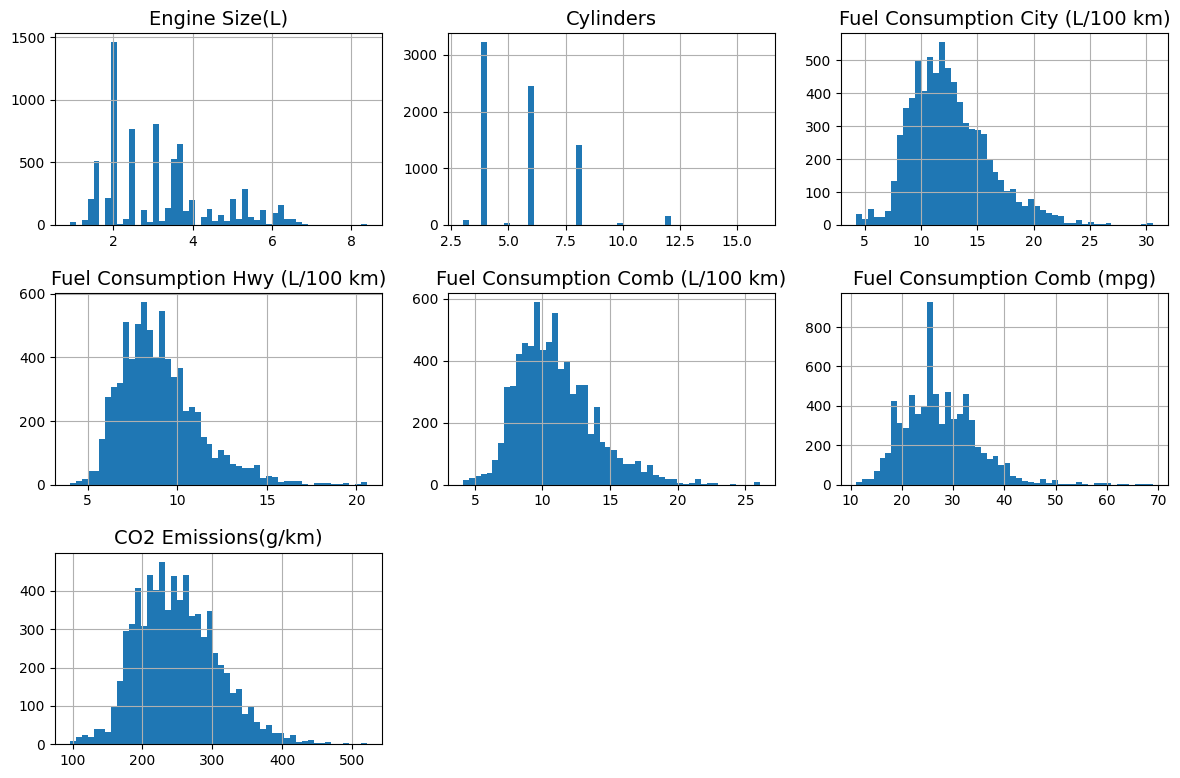

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

vehicle.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  
plt.show()

## Test Set

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(vehicle, test_size=0.2, random_state=35)

In [8]:
test_set.shape[0]

1477

In [9]:
vehicle["Cylinders_cat"] = pd.cut(vehicle["Cylinders"],
                               bins=[0., 3, 5.0, 7.5, np.inf],
                               labels=[1, 2, 3, 4])

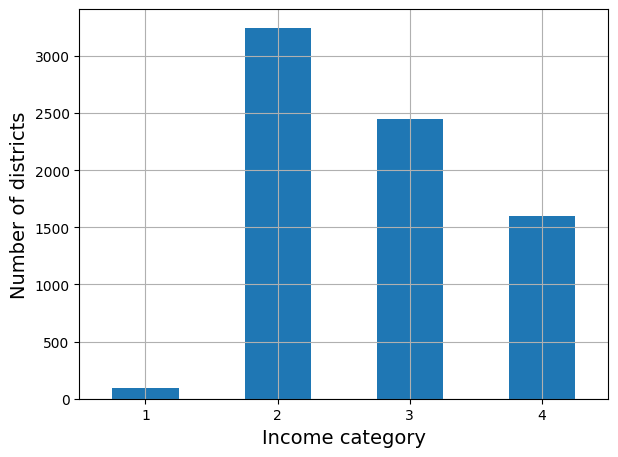

In [10]:
vehicle["Cylinders_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [11]:
strat_train_set, strat_test_set = train_test_split(
    vehicle, test_size=0.2, stratify=vehicle["Cylinders"], random_state=42)

In [12]:
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)

Cylinders
4     0.436019
6     0.331077
8     0.190251
12    0.020311
3     0.012864
10    0.005416
5     0.003385
16    0.000677
Name: count, dtype: float64

In [13]:

def income_cat_proportions(data):
    return data["Cylinders"].value_counts() / len(data)

train_set, test_set = train_test_split(vehicle, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(vehicle),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Cylinders"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Cylinders,,,,,
3,1.29,1.29,1.56,0.00,21.05
4,43.60,43.60,43.81,0.00,0.47
5,0.35,0.34,0.47,-3.85,34.62
6,33.12,33.11,33.11,-0.04,-0.04
8,18.98,19.03,18.69,0.21,-1.57
10,0.57,0.54,0.34,-4.76,-40.48
12,2.04,2.03,2.03,-0.66,-0.66
16,0.04,0.07,NaN,66.67,NaN


In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Cylinders_cat", axis=1, inplace=True)

## Data Analysis

In [15]:
vehicle = strat_train_set.copy()

## Correlation

Relationship between co2 emissions and others variables

In [16]:
corr_matrix = vehicle.corr(numeric_only=True)

In [17]:
corr_matrix["CO2 Emissions(g/km)"].sort_values(ascending=False)

CO2 Emissions(g/km)                 1.000000
Fuel Consumption City (L/100 km)    0.921436
Fuel Consumption Comb (L/100 km)    0.920058
Fuel Consumption Hwy (L/100 km)     0.885706
Engine Size(L)                      0.851716
Cylinders                           0.832653
Fuel Consumption Comb (mpg)        -0.907119
Name: CO2 Emissions(g/km), dtype: float64

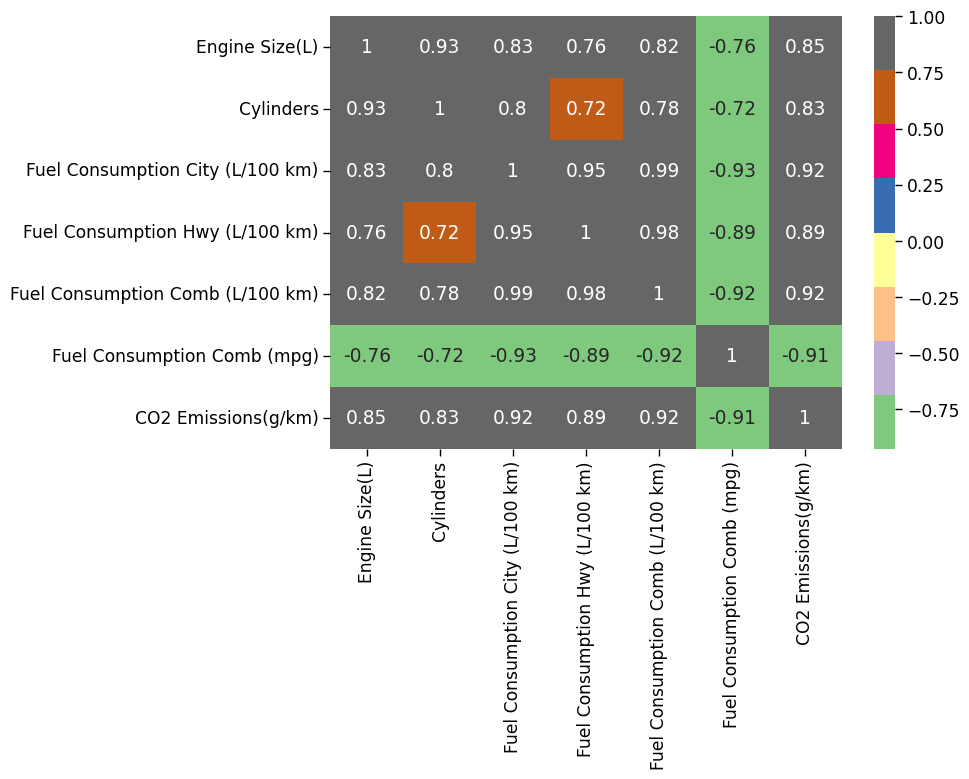

In [18]:
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, cmap='Accent')
save_fig("Mapa de correlação")

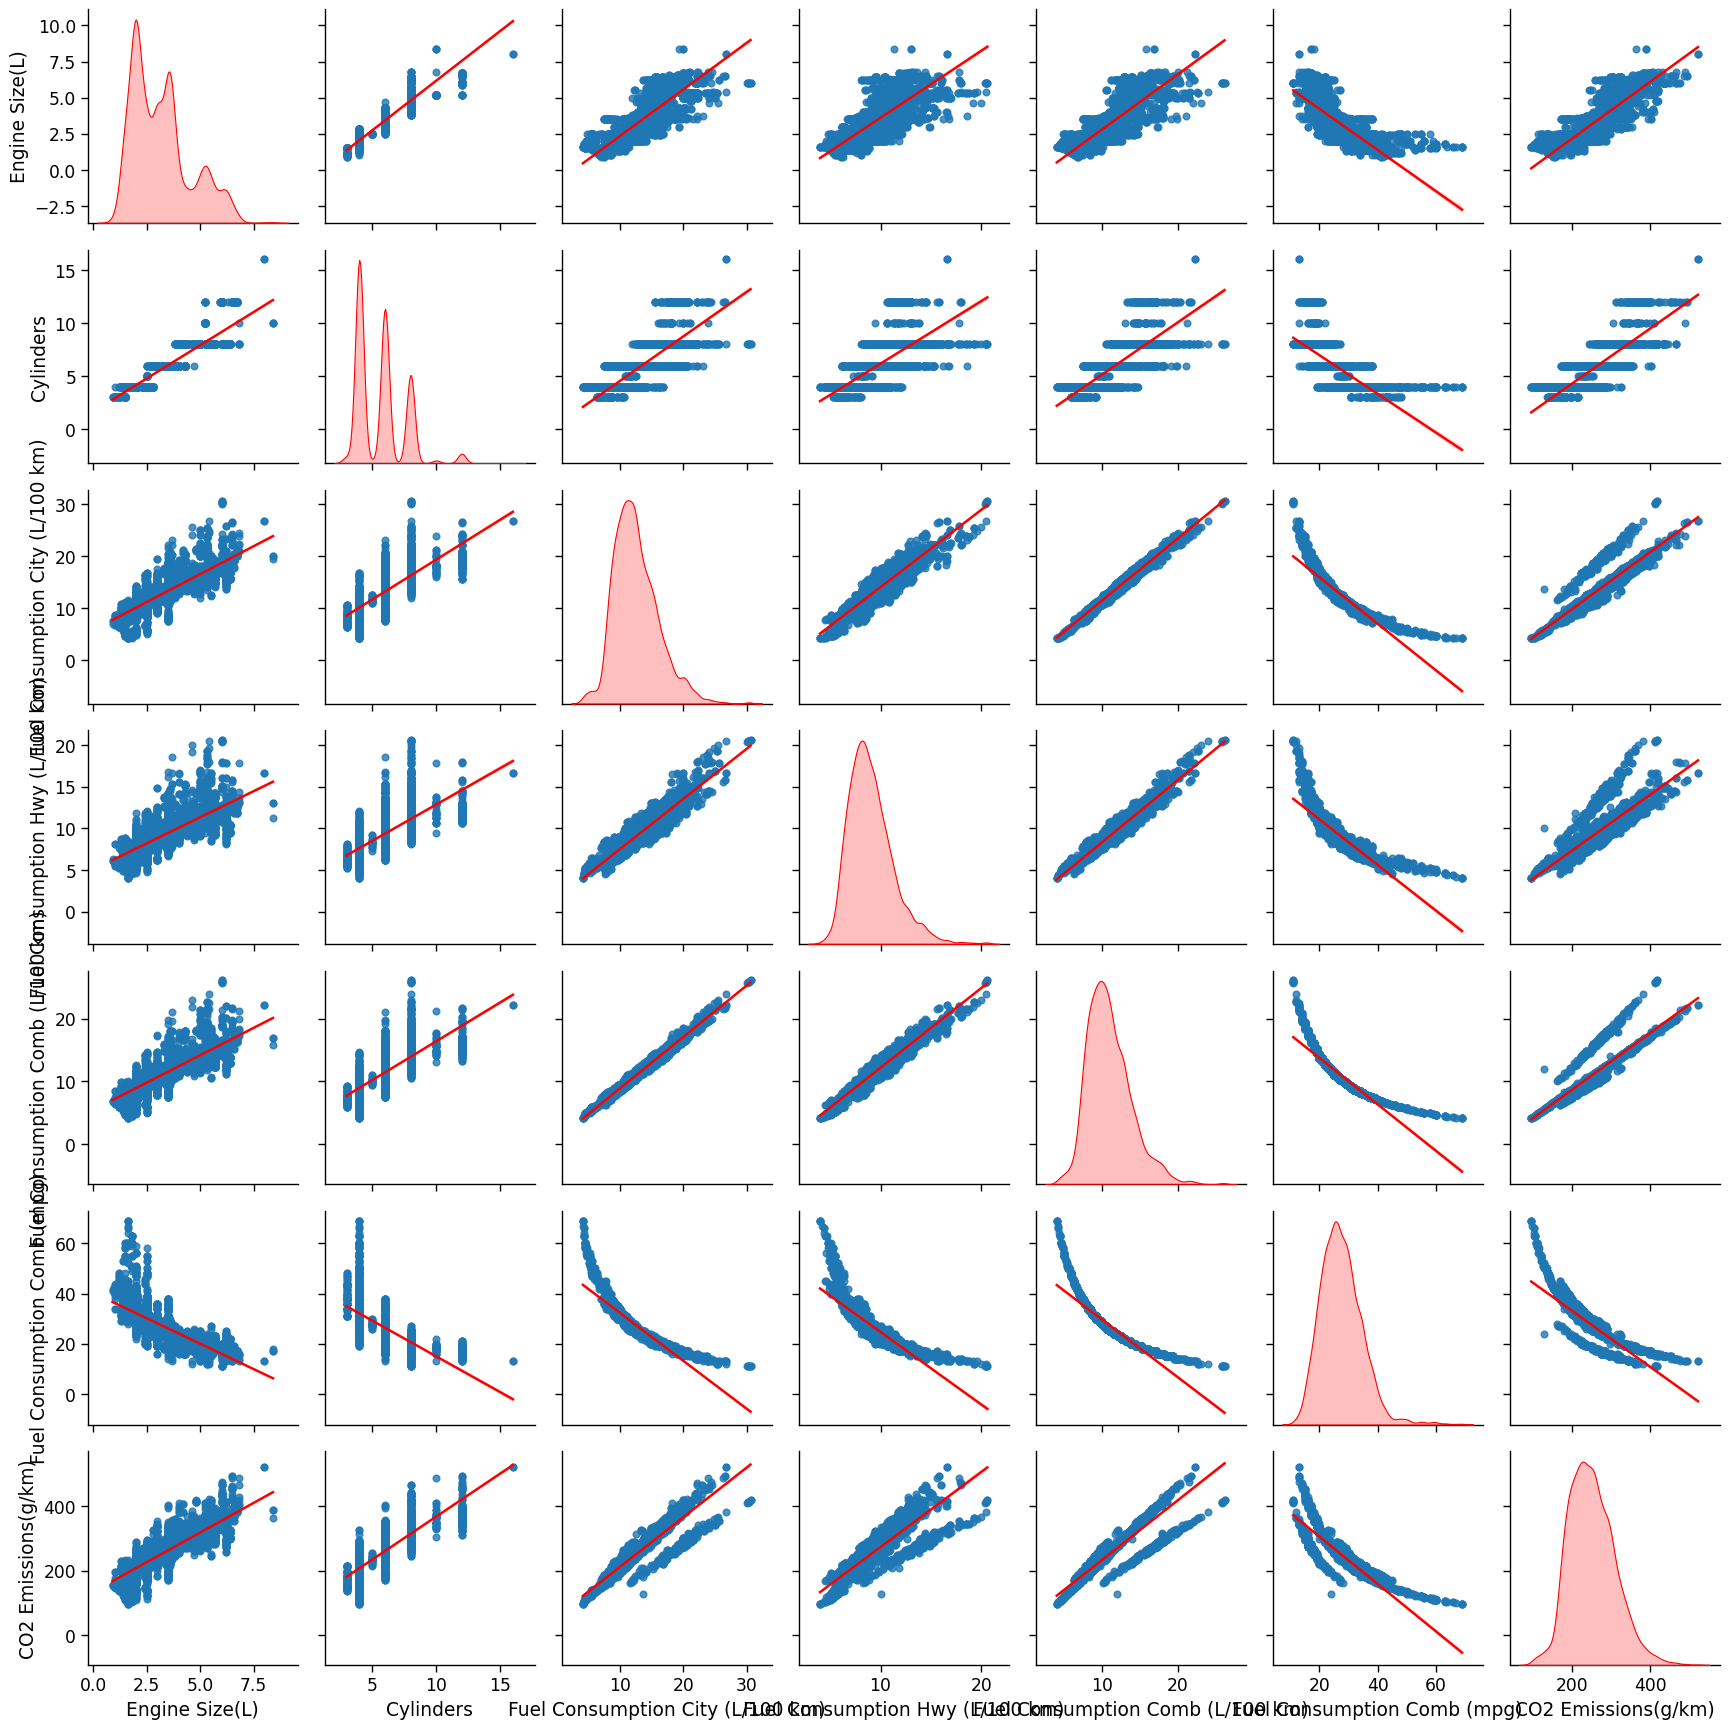

In [19]:
sns.pairplot(vehicle, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});
save_fig("Gráficos correlação")

## Data Preparation

In [20]:
vehicle = strat_train_set.drop("CO2 Emissions(g/km)", axis=1)
vehicle_labels = strat_train_set["CO2 Emissions(g/km)"].copy()

### Numerical Data

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [22]:
vehicle_num = vehicle.select_dtypes(include=[np.number])

In [23]:
imputer.fit(vehicle_num)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([ 3. ,  6. , 12.1,  8.7, 10.5, 27. ])

In [25]:
vehicle_num.median().values

array([ 3. ,  6. , 12.1,  8.7, 10.5, 27. ])

transform the training set

In [26]:
X = imputer.transform(vehicle_num)

In [27]:
imputer.feature_names_in_

array(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)'],
      dtype=object)

In [28]:
vehicle_tr = pd.DataFrame(X, columns=vehicle_num.columns,
                          index=vehicle_num.index)

In [29]:
vehicle_tr.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
6096,2.7,6.0,14.0,9.4,12.0,24.0
5429,1.8,4.0,9.6,7.2,8.5,33.0
6874,3.0,6.0,10.5,9.1,9.9,29.0
847,4.0,6.0,14.8,11.0,13.1,22.0
2207,3.5,6.0,11.9,7.7,10.0,28.0


outliers

In [30]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [31]:
outlier_pred

array([1, 1, 1, ..., 1, 1, 1])

### Categorical Data

In [32]:
veh_cat = vehicle[['Transmission','Fuel Type']]

In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
vehicle_cat_1hot = cat_encoder.fit_transform(veh_cat)

In [34]:
vehicle_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [35]:
cat_encoder.categories_

[array(['A10', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'AM5', 'AM6', 'AM7',
        'AM8', 'AM9', 'AS10', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9',
        'AV', 'AV10', 'AV6', 'AV7', 'AV8', 'M5', 'M6', 'M7'], dtype=object),
 array(['D', 'E', 'N', 'X', 'Z'], dtype=object)]

### Normalize Data

In [36]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
vehicle_num_std_scaled = std_scaler.fit_transform(vehicle_num)

## Pipelines

In [37]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [38]:
vehicle_num_prepared = num_pipeline.fit_transform(vehicle_num)
vehicle_num_prepared[:2].round(2)

array([[-0.34,  0.21,  0.42,  0.16,  0.36, -0.48],
       [-1.  , -0.88, -0.84, -0.82, -0.85,  0.76]])

In [39]:
df_vehicle_num_prepared = pd.DataFrame(
    vehicle_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index= vehicle_num.index)

In [40]:
df_vehicle_num_prepared

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
6096,-0.337490,0.210979,0.415049,0.164712,0.357521,-0.483828
5429,-1.002022,-0.883852,-0.844233,-0.824779,-0.854396,0.761868
6874,-0.115979,0.210979,-0.586653,0.029782,-0.369629,0.208225
847,0.622390,0.210979,0.644009,0.884342,0.738409,-0.760649
2207,0.253205,0.210979,-0.185972,-0.599894,-0.335003,0.069814
...,...,...,...,...,...,...
1520,0.327042,0.210979,0.472289,0.389596,0.461399,-0.622239
6975,-0.854348,-0.883852,-0.500793,-0.330033,-0.438882,0.208225
2536,0.327042,0.210979,0.071608,0.209689,0.115137,-0.345417
5179,-0.854348,-0.883852,-0.844233,-0.734825,-0.819770,0.761868


In [41]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [42]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Engine Size(L)', 'Fuel Consumption City (L/100 km)','Cylinders','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']
cat_attribs = ['Transmission','Fuel Type']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [43]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [44]:
vehicle_prepared = preprocessing.fit_transform(vehicle)

In [45]:
preprocessing.get_feature_names_out()

array(['pipeline-1__Engine Size(L)', 'pipeline-1__Cylinders',
       'pipeline-1__Fuel Consumption City (L/100 km)', ...,
       'pipeline-2__Fuel Type_N', 'pipeline-2__Fuel Type_X',
       'pipeline-2__Fuel Type_Z'], dtype=object)

In [46]:
vehicle_prepared.shape

(5908, 2031)

## Model

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(vehicle, vehicle_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x133947d70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x133947170>)])),
                ('linearregression', LinearRegression())])

In [48]:
vehicle_predictions = lin_reg.predict(vehicle)
vehicle_predictions[:5]

array([279.47738903, 199.37530824, 266.05430602, 306.05032036,
       231.66806922])

In [49]:
vehicle_labels.iloc[:5]

6096    281
5429    199
6874    265
847     301
2207    235
Name: CO2 Emissions(g/km), dtype: int64

In [50]:
error_ratios = vehicle_predictions[:5] / vehicle_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-0.5%, 0.2%, 0.4%, 1.7%, -1.4%


In [51]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(vehicle_labels, vehicle_predictions,
                              squared=False)
lin_rmse

/Users/joseguedes/Documents/programação/Python/ML/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.9773750342103398

### Decision Tree Regression

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(vehicle, vehicle_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x133947d70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x133947170>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [53]:
vehicle_predictions = tree_reg.predict(vehicle)
tree_rmse = mean_squared_error(vehicle_labels, vehicle_predictions,
                              squared=False)
tree_rmse

/Users/joseguedes/Documents/programação/Python/ML/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.906995929366864

#### Better evaluation

In [54]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, vehicle, vehicle_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [55]:
lin_rmses = -cross_val_score(lin_reg, vehicle, vehicle_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean      5.053141
std       0.652931
min       4.319056
25%       4.575539
50%       4.874917
75%       5.576423
max       6.124039
dtype: float64

In [56]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      3.574763
std       0.800202
min       2.893642
25%       2.947309
50%       3.270032
75%       4.247290
max       4.958718
dtype: float64

### Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, vehicle, vehicle_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [58]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      3.060194
std       0.681738
min       2.482365
25%       2.632803
50%       2.718417
75%       3.268752
max       4.284572
dtype: float64

In [59]:
forest_reg.fit(vehicle, vehicle_labels)
vehicle_predictions = forest_reg.predict(vehicle)
forest_rmse = mean_squared_error(vehicle_labels, vehicle_predictions,
                                 squared=False)
forest_rmse

/Users/joseguedes/Documents/programação/Python/ML/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.3596109034397263

overfit the model

## Fine-Tune the model

In [60]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_distribs = {
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(vehicle, vehicle_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x133947d70>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                Simple...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x133947170>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x134b4ce60>},
                   random_state=42, scoring='neg_root_mean_squared_error')

## Best Model

In [65]:
final_model = rnd_search.best_estimator_ 
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.1 , 0.13, ..., 0.  , 0.01, 0.01])

In [66]:
X_test = strat_test_set.drop("CO2 Emissions(g/km)", axis=1)
y_test = strat_test_set["CO2 Emissions(g/km)"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

4.610744123864564


/Users/joseguedes/Documents/programação/Python/ML/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([4.21766053, 4.97285254])

In [68]:
import joblib

joblib.dump(final_model, "co2_vehicle_model.pkl")

['co2_vehicle_model.pkl']

In [69]:
import joblib

from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]


final_model_reloaded = joblib.load("co2_vehicle_model.pkl")

new_data = vehicle.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [70]:
predictions

array([280.62      , 197.7       , 264.98      , 303.8025    ,
       231.42114286])